# Experiment 3: Exploratory Data Analysis & Statistical Analysis

**Aim:** Exploratory Data Analysis & Statistical Analysis

**Objectives:**
1. To visualize the distribution of classes and features in the dataset
2. To understand the spread and central tendency of data using plots
3. To identify correlations between features using heatmaps
4. To perform statistical hypothesis testing (e.g., t-tests) to determine if observed differences are significant

**Tools:** Matplotlib, Seaborn, Plotly, SciPy, Statsmodels

## Import Required Libraries

In [9]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import normaltest, shapiro, kstest, ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors

# Distribution fitting
from scipy.stats import norm, poisson, expon, gamma

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 1. Data Loading and Initial Exploration

In [10]:
# Load the cleaned dataset
df = pd.read_csv("../../datasets/DS-2-8-25/cleaned_clothing_dataset.csv")

print("📊 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n📈 First 5 rows:")
display(df.head())

print("\n📋 Data Types:")
print(df.dtypes)

print("\n🔍 Basic Statistics:")
display(df.describe())

📊 Dataset Overview:
Shape: (1240, 29)
Columns: ['source', 'category', 'brand', 'name', 'price', 'original_price', 'rating', 'rating_count', 'url', 'scraped_date', 'size', 'color', 'material', 'discount_percentage', 'availability', 'product_id', 'is_bestseller', 'return_policy', 'delivery_time', 'season', 'trending', 'customer_reviews', 'flipkart_assured', 'prime_eligible', 'amazon_choice', 'discount_value', 'discount_flag', 'scraped_weekday', 'time_of_day_flag']

📈 First 5 rows:


,source,category,brand,name,price,original_price,rating,rating_count,url,scraped_date,...,season,trending,customer_reviews,flipkart_assured,prime_eligible,amazon_choice,discount_value,discount_flag,scraped_weekday,time_of_day_flag
0,myntra,Men Tshirts,WROGN,WROGN Green Plain T-Shirt,628,857,4.8,3497,https://www.myntra.com/men-tshirts/wrogn-1,2025-08-02,...,festive,False,459,NaN,NaN,NaN,229,1,Saturday,Afternoon
1,myntra,Men Tshirts,WROGN,WROGN Classic Grey Round Neck T-Shirt,875,986,4.0,726,https://www.myntra.com/men-tshirts/wrogn-2,2025-08-02,...,festive,False,430,NaN,NaN,NaN,111,1,Saturday,Afternoon
2,myntra,Men Tshirts,Anouk,Anouk Grey Casual T-Shirt,631,784,4.2,3354,https://www.myntra.com/men-tshirts/anouk-3,2025-08-02,...,festive,False,301,NaN,NaN,NaN,153,1,Saturday,Afternoon
3,myntra,Men Tshirts,WROGN,WROGN Pink Plain T-Shirt,694,944,4.0,4377,https://www.myntra.com/men-tshirts/wrogn-4,2025-08-02,...,festive,False,222,NaN,NaN,NaN,250,1,Saturday,Afternoon
4,myntra,Men Tshirts,Anouk,Anouk Red Round Neck T-Shirt,499,568,4.4,4141,https://www.myntra.com/men-tshirts/anouk-5,2025-08-02,...,festive,False,207,NaN,NaN,NaN,69,1,Saturday,Morning



📋 Data Types:
source                  object
category                object
brand                   object
name                    object
price                    int64
original_price           int64
rating                 float64
rating_count             int64
url                     object
scraped_date            object
size                    object
color                   object
material                object
discount_percentage    float64
availability            object
product_id              object
is_bestseller             bool
return_policy           object
delivery_time           object
season                  object
trending                  bool
customer_reviews         int64
flipkart_assured        object
prime_eligible          object
amazon_choice           object
discount_value           int64
discount_flag            int64
scraped_weekday         object
time_of_day_flag        object
dtype: object

🔍 Basic Statistics:


,price,original_price,rating,rating_count,discount_percentage,customer_reviews,discount_value,discount_flag
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,1078.445161,1503.287097,4.006532,3756.056452,24.190621,262.008871,424.841935,0.998387
std,470.529222,833.968720,0.399654,2440.331561,17.006293,146.787292,584.299132,0.040145
min,239.000000,261.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,707.750000,954.750000,3.700000,1615.750000,11.505000,135.000000,131.750000,1.000000
50%,1002.500000,1355.500000,4.000000,3491.000000,20.775000,266.000000,251.000000,1.000000
75%,1388.250000,1815.500000,4.300000,5805.750000,33.390000,396.250000,391.250000,1.000000
max,2835.000000,8787.000000,4.800000,9976.000000,69.970000,500.000000,5952.000000,1.000000


## 2. Class Balance Analysis

Visualizing the distribution of classes and categories in the dataset

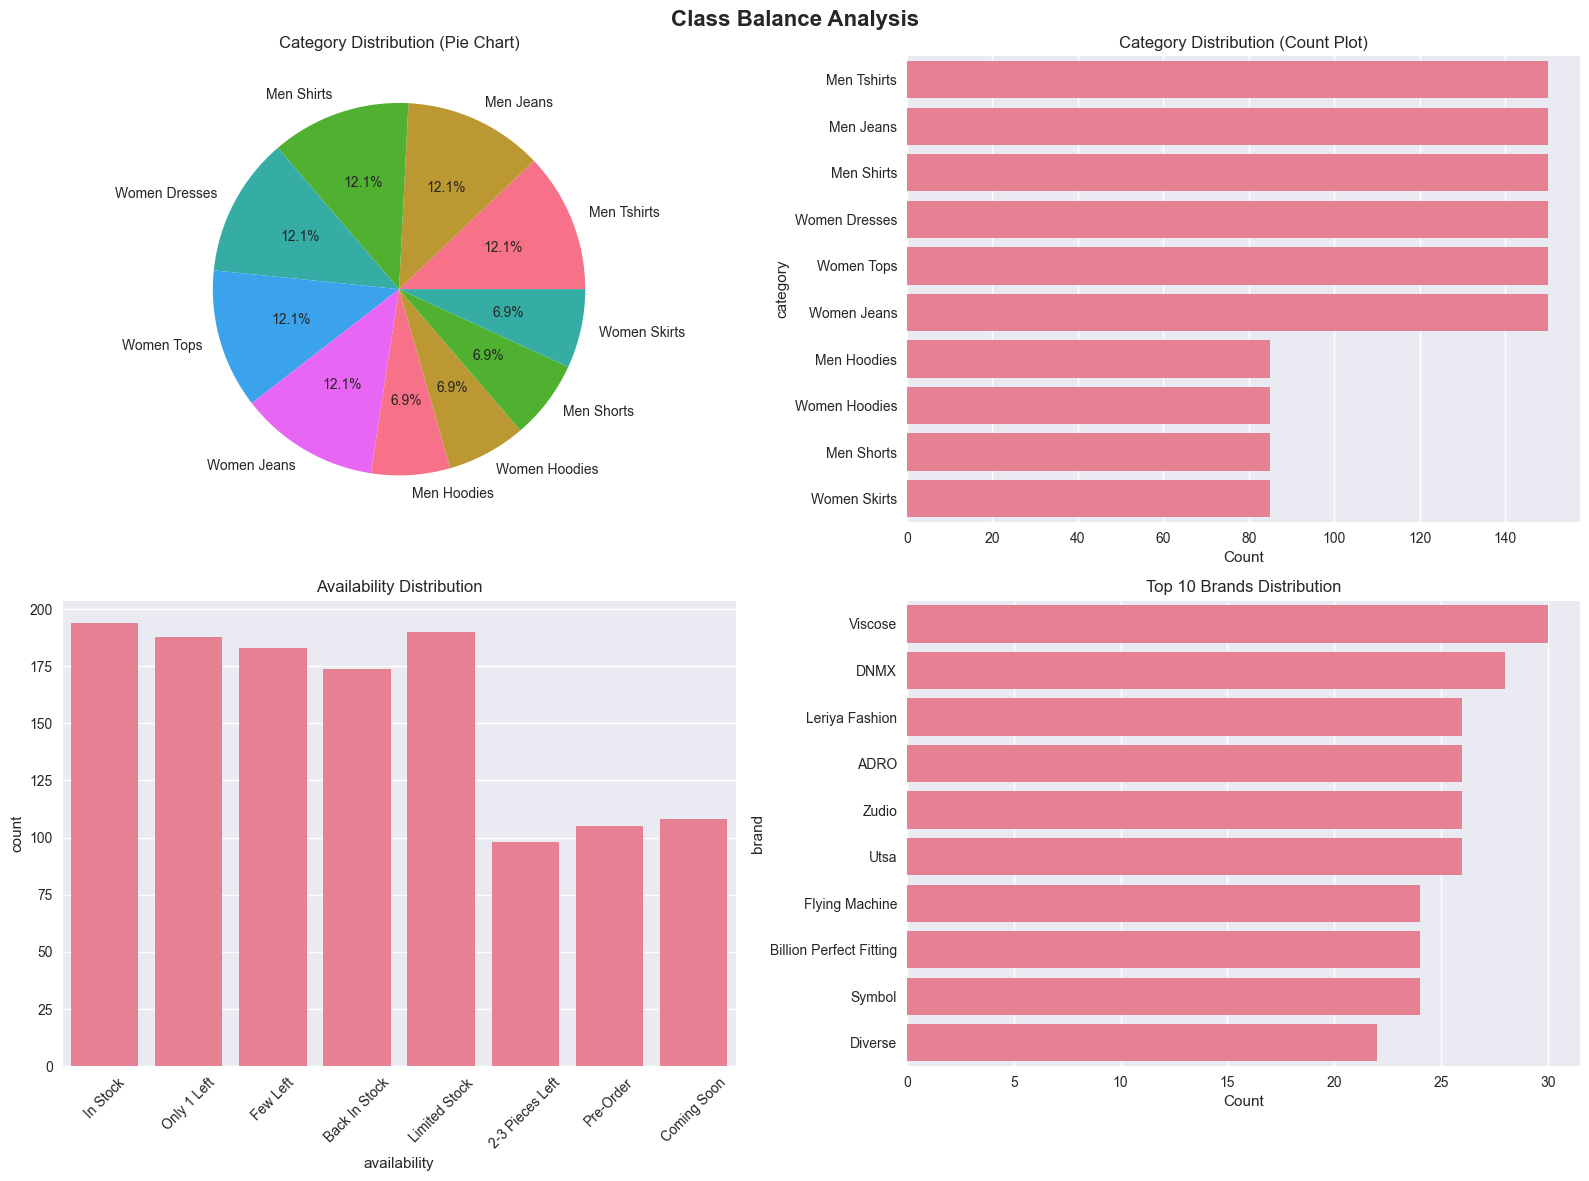

📊 Class Balance Statistics:

🏷️ Category Distribution:
category
Men Tshirts      150
Men Jeans        150
Men Shirts       150
Women Dresses    150
Women Tops       150
Women Jeans      150
Men Hoodies       85
Women Hoodies     85
Men Shorts        85
Women Skirts      85
Name: count, dtype: int64

📈 Category Proportions:
category
Men Tshirts      0.121
Men Jeans        0.121
Men Shirts       0.121
Women Dresses    0.121
Women Tops       0.121
Women Jeans      0.121
Men Hoodies      0.069
Women Hoodies    0.069
Men Shorts       0.069
Women Skirts     0.069
Name: proportion, dtype: float64


In [ ]:
# Create subplots for class balance analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Class Balance Analysis', fontsize=16, fontweight='bold')

# 1. Category distribution
category_counts = df['category'].value_counts()
axes[0, 0].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Category Distribution (Pie Chart)')

# 2. Category count plot
sns.countplot(data=df, y='category', ax=axes[0, 1], order=df['category'].value_counts().index)
axes[0, 1].set_title('Category Distribution (Count Plot)')
axes[0, 1].set_xlabel('Count')

# 3. Availability distribution
if 'availability' in df.columns:
    sns.countplot(data=df, x='availability', ax=axes[1, 0])
    axes[1, 0].set_title('Availability Distribution')
    axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Brand distribution (top 10)
if 'brand' in df.columns:
    top_brands = df['brand'].value_counts().head(10)
    sns.barplot(x=top_brands.values, y=top_brands.index, ax=axes[1, 1])
    axes[1, 1].set_title('Top 10 Brands Distribution')
    axes[1, 1].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Print class balance statistics
print("📊 Class Balance Statistics:")
print(f"\n🏷️ Category Distribution:")
print(df['category'].value_counts())
print(f"\n📈 Category Proportions:")
print(df['category'].value_counts(normalize=True).round(3))



## 3. Feature Distribution Analysis

Understanding the spread and central tendency of numerical features using histograms and box plots

📊 Numerical columns: ['price', 'original_price', 'rating', 'rating_count', 'discount_percentage', 'customer_reviews', 'discount_value', 'discount_flag']


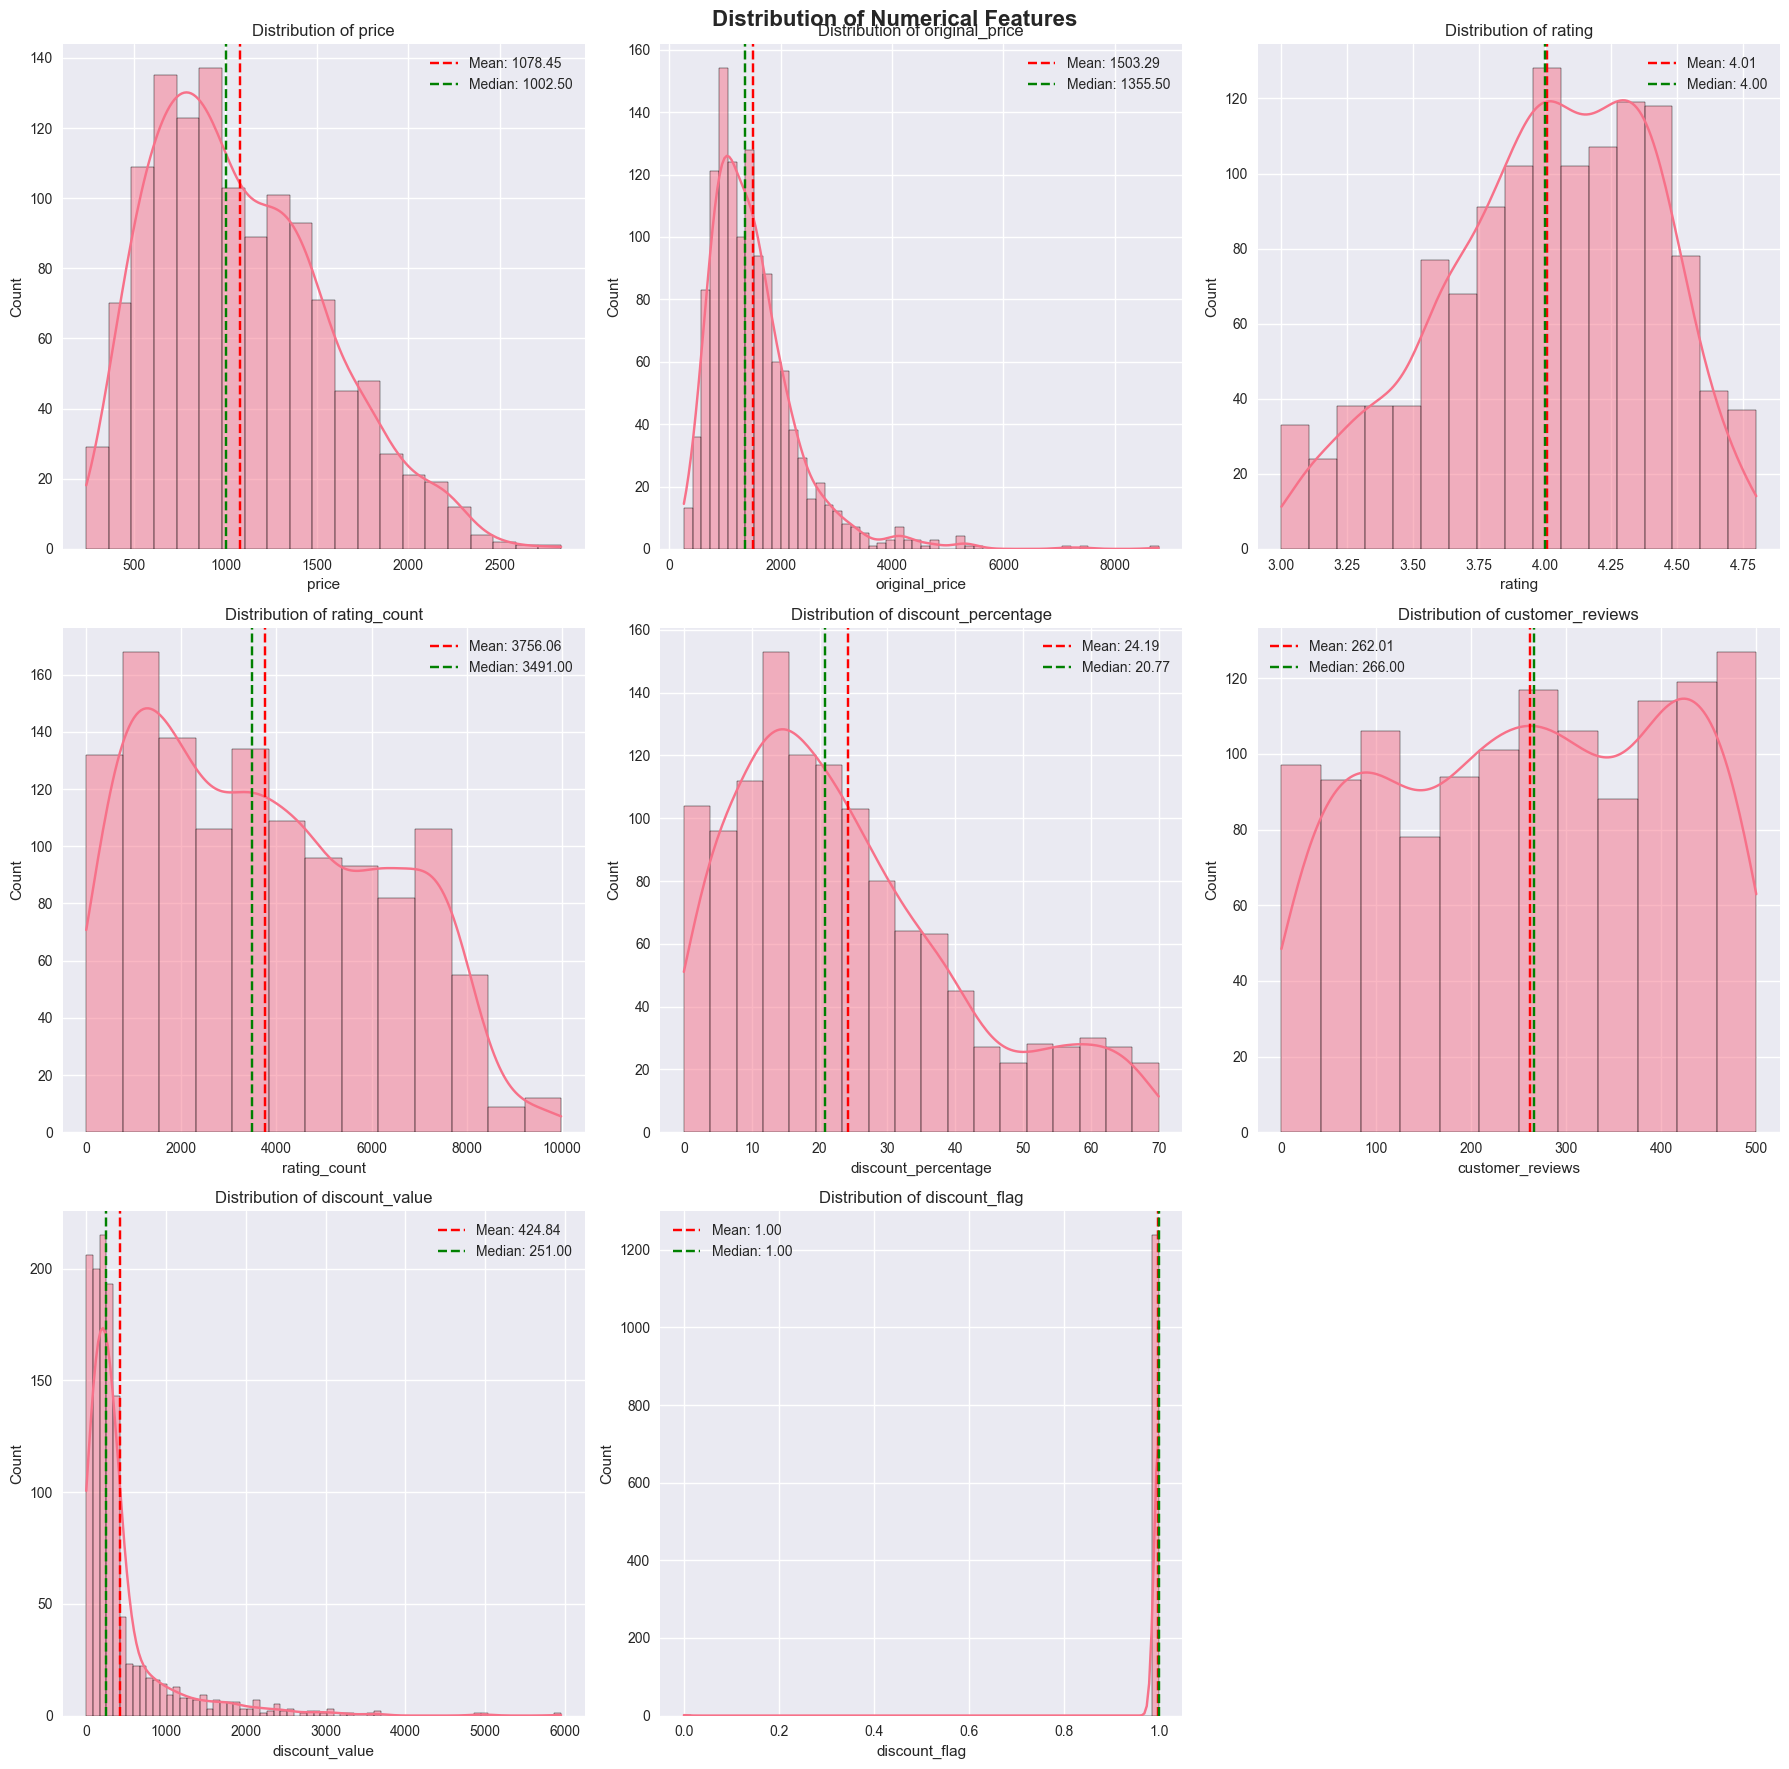

In [12]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"📊 Numerical columns: {numerical_cols}")

# Create distribution plots for numerical features
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3  # 3 columns per row

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numerical_cols[:len(axes)]):
    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.2f}')
    axes[i].legend()

# Hide empty subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

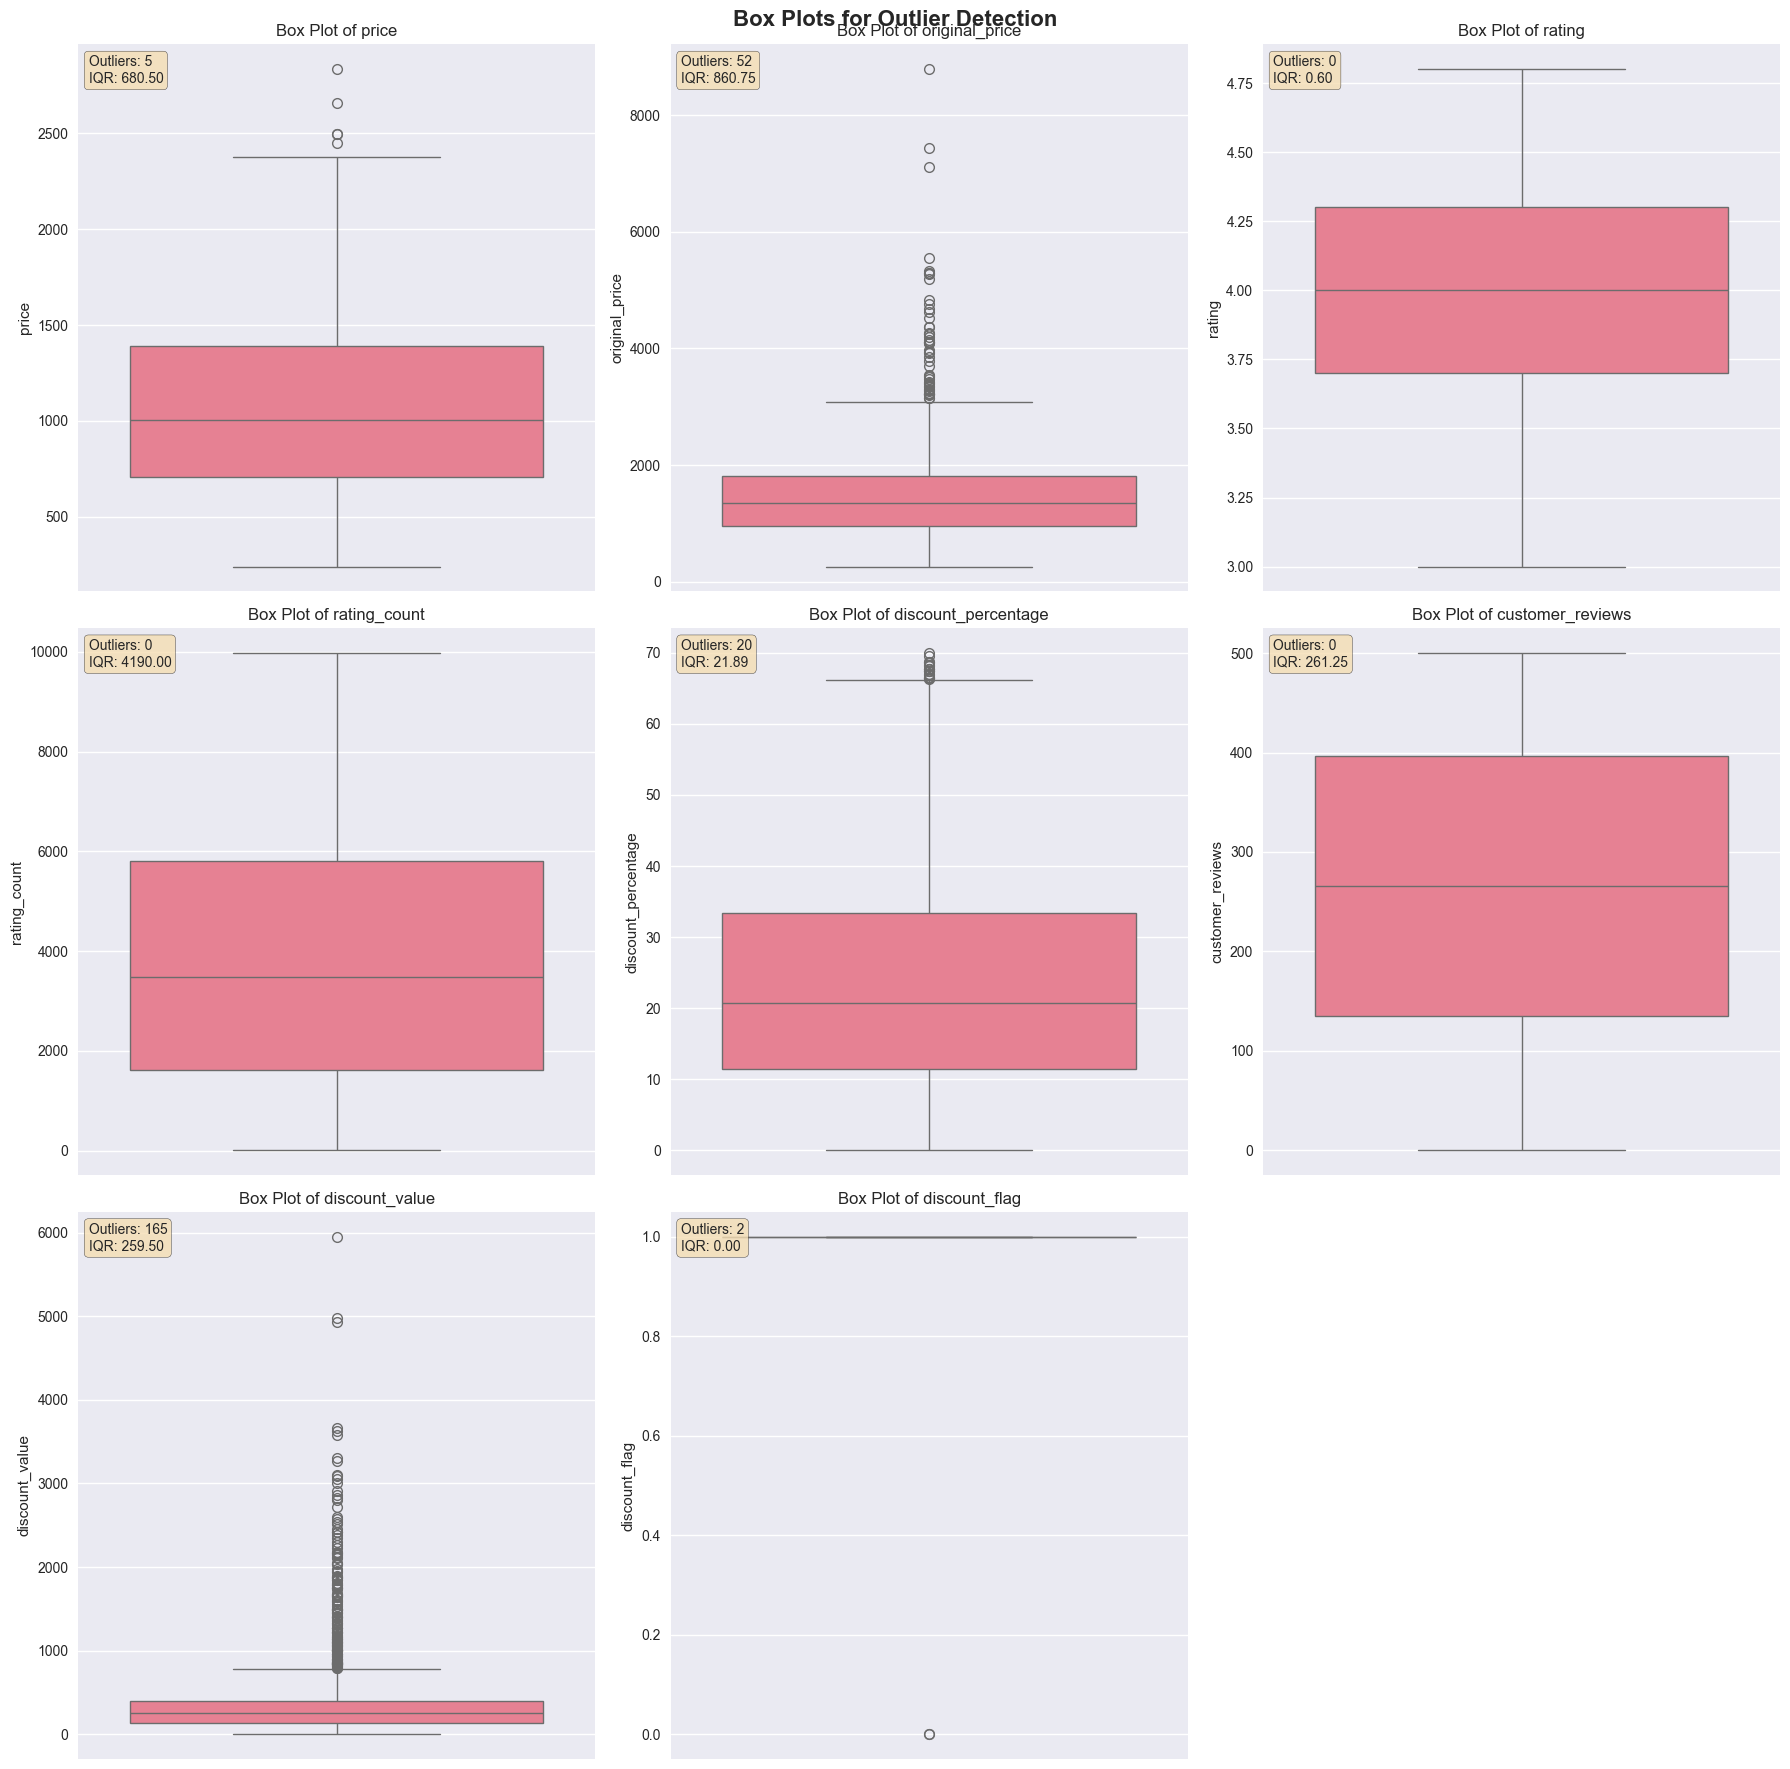

📈 Summary Statistics for Numerical Features:


,price,original_price,rating,rating_count,discount_percentage,customer_reviews,discount_value,discount_flag
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,1078.445161,1503.287097,4.006532,3756.056452,24.190621,262.008871,424.841935,0.998387
std,470.529222,833.968720,0.399654,2440.331561,17.006293,146.787292,584.299132,0.040145
min,239.000000,261.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,707.750000,954.750000,3.700000,1615.750000,11.505000,135.000000,131.750000,1.000000
50%,1002.500000,1355.500000,4.000000,3491.000000,20.775000,266.000000,251.000000,1.000000
75%,1388.250000,1815.500000,4.300000,5805.750000,33.390000,396.250000,391.250000,1.000000
max,2835.000000,8787.000000,4.800000,9976.000000,69.970000,500.000000,5952.000000,1.000000


In [13]:
import matplotlib.pyplot as plt

# Box plots for outlier detection
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold')

axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numerical_cols[:len(axes)]):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    
    # Add statistics
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    axes[i].text(0.02, 0.98, f'Outliers: {len(outliers)}\nIQR: {iqr:.2f}', 
                transform=axes[i].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Hide empty subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Print summary statistics
print("📈 Summary Statistics for Numerical Features:")
summary_stats = df[numerical_cols].describe()
display(summary_stats)

## 4. Correlation Analysis

Identifying correlations between features using correlation matrix and heatmaps

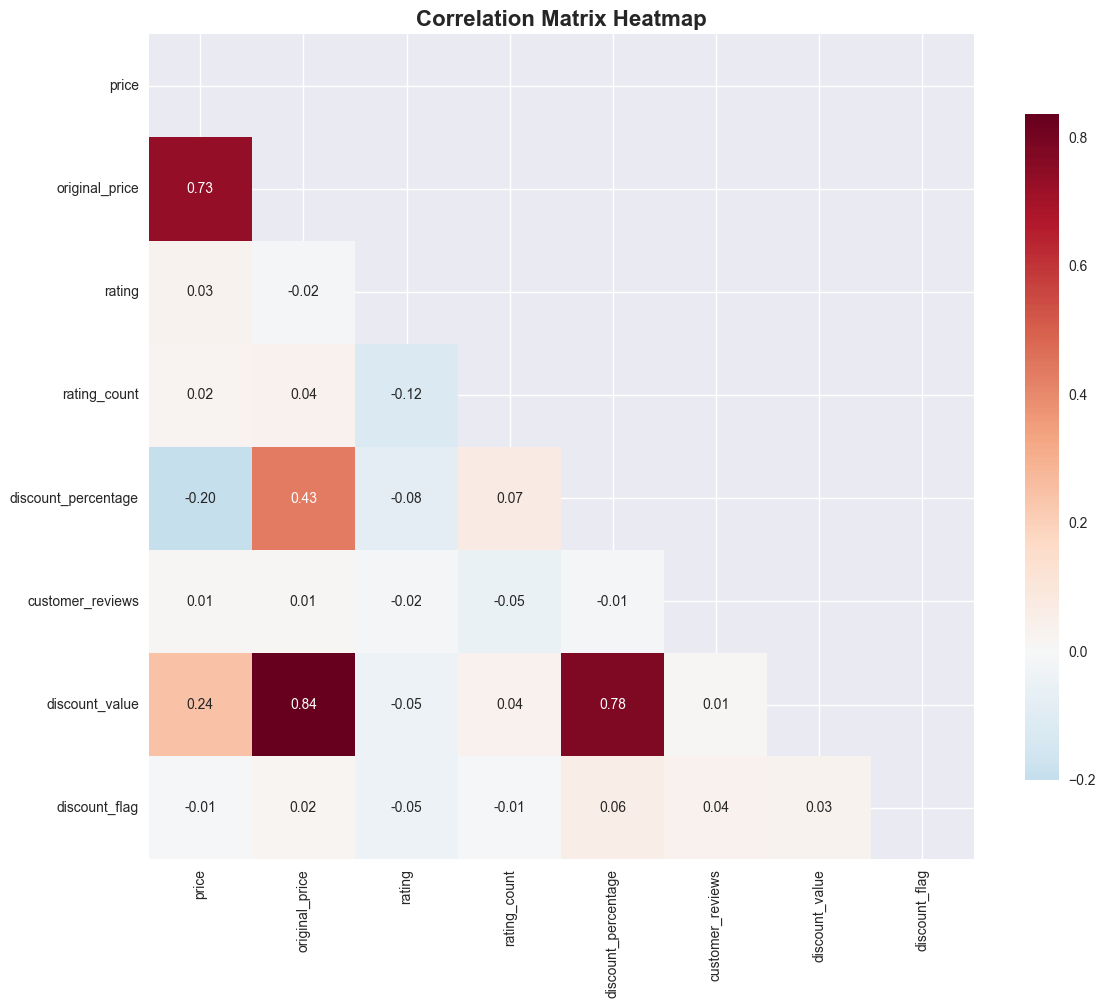

🔗 Strong Correlations (|r| > 0.7):
  price ↔ original_price: 0.733
  original_price ↔ discount_value: 0.837
  discount_percentage ↔ discount_value: 0.778


In [14]:
# Calculate correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find strong correlations (absolute value > 0.7)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            strong_correlations.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], 
                                      corr_value))

print("🔗 Strong Correlations (|r| > 0.7):")
if strong_correlations:
    for feature1, feature2, corr in strong_correlations:
        print(f"  {feature1} ↔ {feature2}: {corr:.3f}")
else:
    print("  No strong correlations found.")

In [ ]:

#%pip install nbformat

In [15]:

# Interactive correlation heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=correlation_matrix.round(2).values,
    texttemplate="%{text}",
    textfont={"size": 10},
    hoverongaps=False
))

fig.update_layout(
    title='Interactive Correlation Matrix',
    xaxis_nticks=36,
    width=800,
    height=600
)

fig.show()

## 5. Statistical Hypothesis Testing

Performing t-tests and other statistical tests to determine if observed differences are significant

📊 Statistical Hypothesis Testing

🔍 Comparing price between 'Men Tshirts' and 'Men Jeans'
Men Tshirts: n=150, mean=552.37, std=160.28
Men Jeans: n=150, mean=1336.72, std=362.51

📈 Independent T-Test Results:
  H0: Mean price is equal between Men Tshirts and Men Jeans
  H1: Mean price is different between Men Tshirts and Men Jeans
  T-statistic: -24.2359
  P-value: 0.000000
  Alpha level: 0.05
  ✅ Conclusion: Reject H0 - Significant difference exists (p < 0.05)


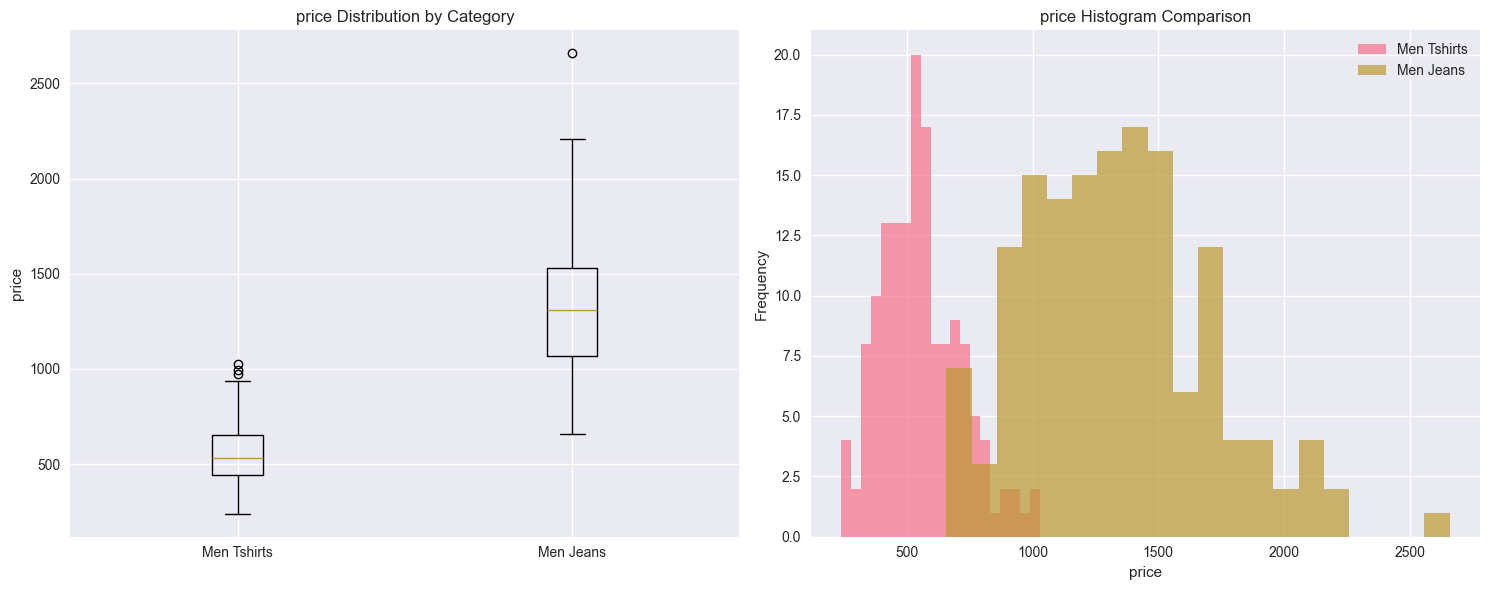

In [16]:
# Hypothesis Testing: Compare price distributions across categories
print("📊 Statistical Hypothesis Testing")
print("="*50)

# Check if 'price' column exists
price_col = None
for col in ['price', 'Price', 'original_price', 'cost']:
    if col in df.columns:
        price_col = col
        break

if price_col and 'category' in df.columns:
    # Get top 2 categories for comparison
    top_categories = df['category'].value_counts().head(2).index.tolist()
    
    if len(top_categories) >= 2:
        cat1, cat2 = top_categories[0], top_categories[1]
        
        # Extract price data for each category
        prices_cat1 = df[df['category'] == cat1][price_col].dropna()
        prices_cat2 = df[df['category'] == cat2][price_col].dropna()
        
        print(f"\n🔍 Comparing {price_col} between '{cat1}' and '{cat2}'")
        print(f"{cat1}: n={len(prices_cat1)}, mean={prices_cat1.mean():.2f}, std={prices_cat1.std():.2f}")
        print(f"{cat2}: n={len(prices_cat2)}, mean={prices_cat2.mean():.2f}, std={prices_cat2.std():.2f}")
        
        # Perform independent t-test
        t_stat, p_value = ttest_ind(prices_cat1, prices_cat2)
        
        print(f"\n📈 Independent T-Test Results:")
        print(f"  H0: Mean {price_col} is equal between {cat1} and {cat2}")
        print(f"  H1: Mean {price_col} is different between {cat1} and {cat2}")
        print(f"  T-statistic: {t_stat:.4f}")
        print(f"  P-value: {p_value:.6f}")
        print(f"  Alpha level: 0.05")
        
        if p_value < 0.05:
            print(f"  ✅ Conclusion: Reject H0 - Significant difference exists (p < 0.05)")
        else:
            print(f"  ❌ Conclusion: Fail to reject H0 - No significant difference (p ≥ 0.05)")
        
        # Visualize the comparison
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Box plot comparison
        data_for_plot = [prices_cat1, prices_cat2]
        axes[0].boxplot(data_for_plot, labels=[cat1, cat2])
        axes[0].set_title(f'{price_col} Distribution by Category')
        axes[0].set_ylabel(price_col)
        
        # Histogram comparison
        axes[1].hist(prices_cat1, alpha=0.7, label=cat1, bins=20)
        axes[1].hist(prices_cat2, alpha=0.7, label=cat2, bins=20)
        axes[1].set_title(f'{price_col} Histogram Comparison')
        axes[1].set_xlabel(price_col)
        axes[1].set_ylabel('Frequency')
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()
        
else:
    print("⚠️ Required columns for t-test not found in dataset")

In [17]:
# Additional Statistical Tests
print("\n🧮 Additional Statistical Tests")
print("="*40)

if price_col:
    prices = df[price_col].dropna()
    
    # 1. Normality Tests
    print("\n📊 Normality Tests for Price:")
    
    # Shapiro-Wilk test (for small samples)
    if len(prices) <= 5000:
        shapiro_stat, shapiro_p = shapiro(prices)
        print(f"  Shapiro-Wilk: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.6f}")
    
    # D'Agostino's normality test
    dagostino_stat, dagostino_p = normaltest(prices)
    print(f"  D'Agostino: statistic={dagostino_stat:.4f}, p-value={dagostino_p:.6f}")
    
    # Kolmogorov-Smirnov test
    ks_stat, ks_p = kstest(prices, 'norm', args=(prices.mean(), prices.std()))
    print(f"  Kolmogorov-Smirnov: statistic={ks_stat:.4f}, p-value={ks_p:.6f}")
    
    print("\n  Interpretation: If p-value < 0.05, data is NOT normally distributed")

# Chi-square test for categorical variables
if 'category' in df.columns and 'availability' in df.columns:
    print("\n🔍 Chi-square Test of Independence: Category vs Availability")
    
    # Create contingency table
    contingency_table = pd.crosstab(df['category'], df['availability'])
    print("\nContingency Table:")
    display(contingency_table)
    
    # Perform chi-square test
    chi2_stat, chi2_p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\n📈 Chi-square Test Results:")
    print(f"  H0: Category and Availability are independent")
    print(f"  H1: Category and Availability are dependent")
    print(f"  Chi-square statistic: {chi2_stat:.4f}")
    print(f"  P-value: {chi2_p:.6f}")
    print(f"  Degrees of freedom: {dof}")
    
    if chi2_p < 0.05:
        print(f"  ✅ Conclusion: Reject H0 - Variables are dependent (p < 0.05)")
    else:
        print(f"  ❌ Conclusion: Fail to reject H0 - Variables are independent (p ≥ 0.05)")


🧮 Additional Statistical Tests

📊 Normality Tests for Price:
  Shapiro-Wilk: statistic=0.9653, p-value=0.000000
  D'Agostino: statistic=67.3659, p-value=0.000000
  Kolmogorov-Smirnov: statistic=0.0722, p-value=0.000005

  Interpretation: If p-value < 0.05, data is NOT normally distributed

🔍 Chi-square Test of Independence: Category vs Availability

Contingency Table:


availability,2-3 Pieces Left,Back In Stock,Coming Soon,Few Left,In Stock,Limited Stock,Only 1 Left,Pre-Order
category,,,,,,,,
Men Hoodies,10,12,14,11,12,9,13,4
Men Jeans,10,20,10,28,28,25,21,8
Men Shirts,7,23,9,23,27,24,29,8
Men Shorts,8,6,12,13,8,9,13,16
Men Tshirts,11,23,9,15,25,25,33,9
Women Dresses,8,27,11,20,19,27,22,16
Women Hoodies,13,8,13,11,11,15,4,10
Women Jeans,11,20,11,27,27,24,21,9
Women Skirts,13,7,9,17,10,10,10,9



📈 Chi-square Test Results:
  H0: Category and Availability are independent
  H1: Category and Availability are dependent
  Chi-square statistic: 101.8748
  P-value: 0.001400
  Degrees of freedom: 63
  ✅ Conclusion: Reject H0 - Variables are dependent (p < 0.05)


## 6. Distribution Fitting and Analysis

Fitting distributions (Gaussian, Poisson, etc.) to continuous and discrete variables

📈 Distribution Fitting Analysis

Normal Distribution:
  Parameters: (np.float64(1078.4451612903226), np.float64(470.33945383246936))
  AIC Score: 18783.54

Exponential Distribution:
  Parameters: (0.0, 1078.4451612903226)
  AIC Score: 19802.52

Gamma Distribution:
  Parameters: (np.float64(3.7139474399478267), np.float64(138.7620053401638), np.float64(253.01466328212496))
  AIC Score: 18636.93

Log-Normal Distribution:
  Parameters: (np.float64(0.34636535867992935), -289.5847945439097, np.float64(1289.5854076461433))
  AIC Score: 18657.47


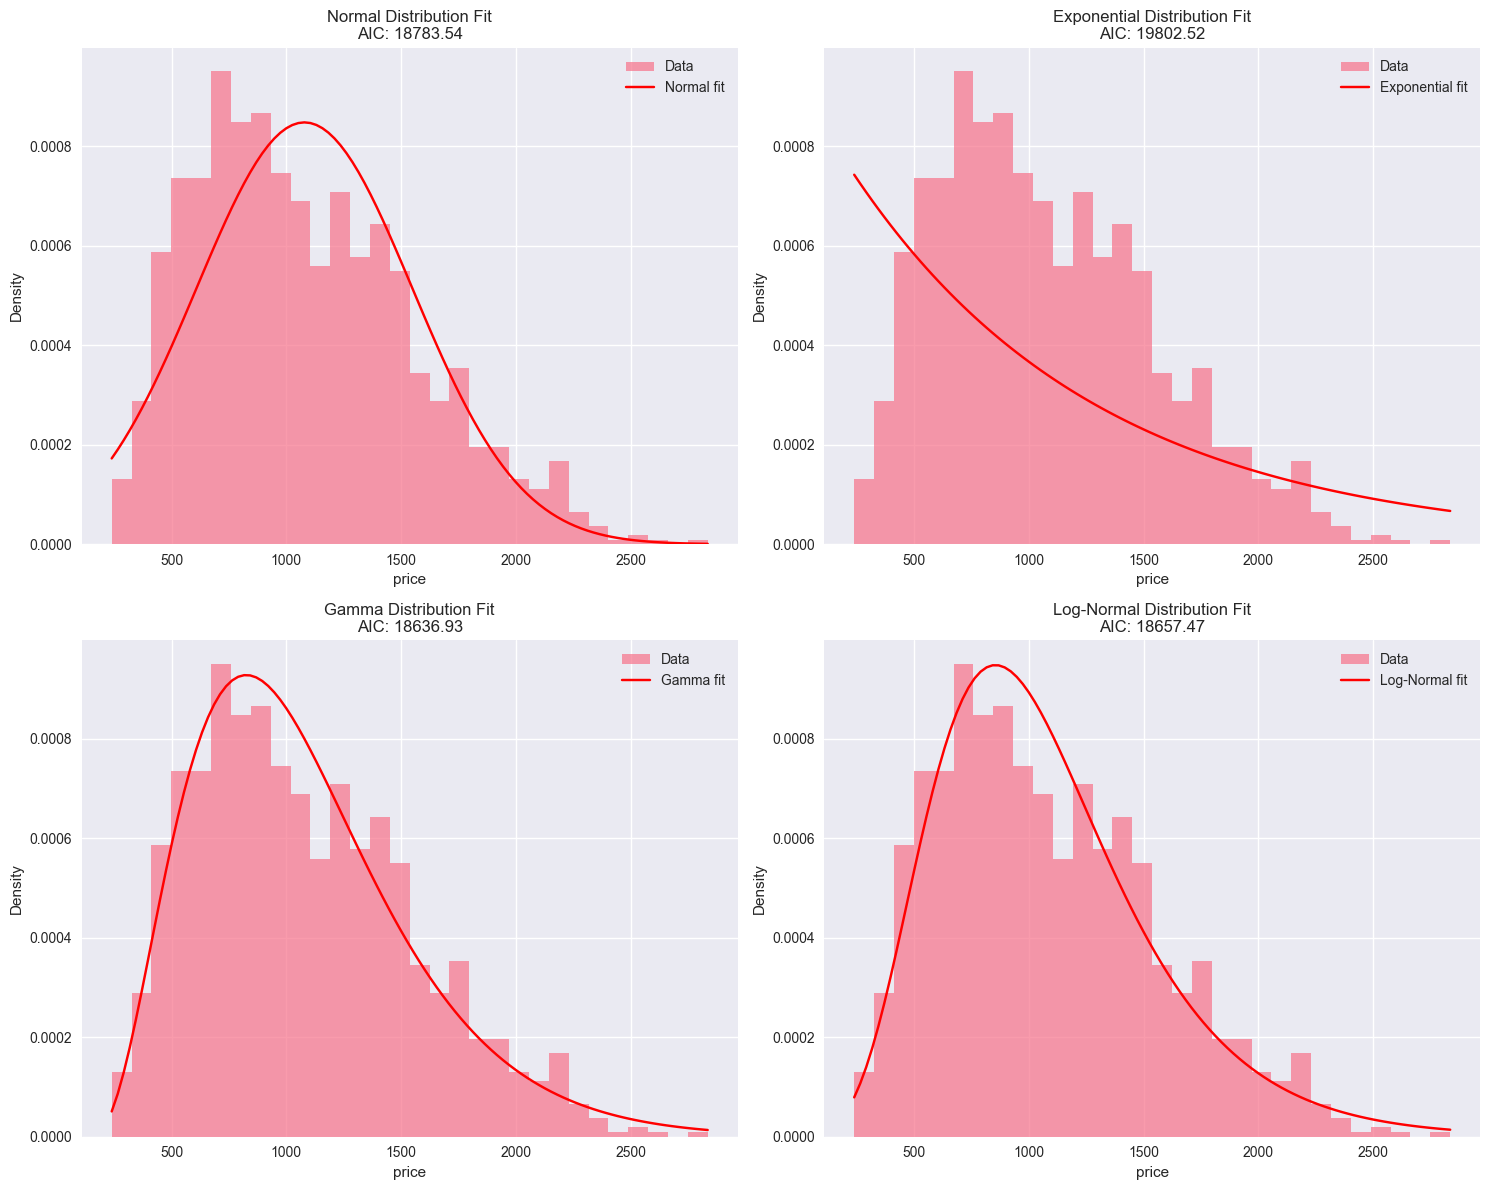


🏆 Best Fitting Distribution: Gamma (Lowest AIC: 18636.93)

📊 Discrete Distribution Analysis for rating:


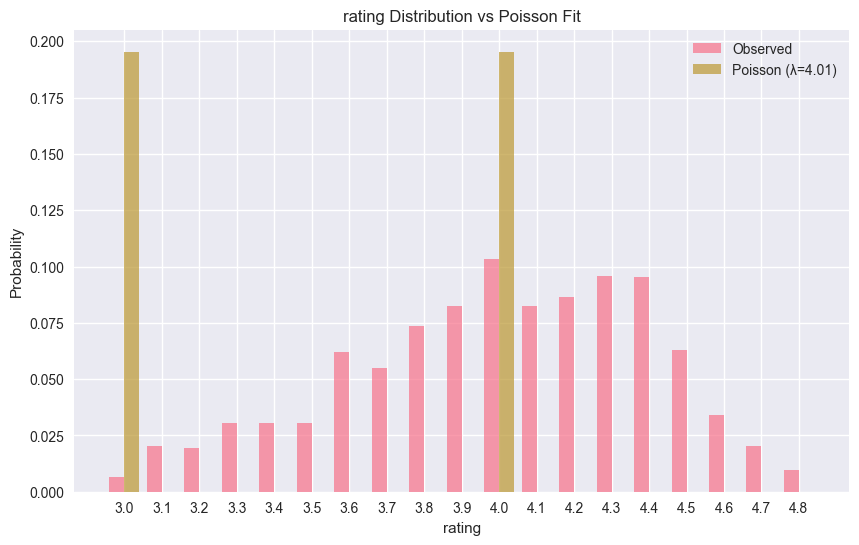

  Mean rating: 4.01
  Poisson parameter (λ): 4.01


In [18]:
# Distribution Fitting Analysis
print("📈 Distribution Fitting Analysis")
print("="*40)

if price_col:
    prices = df[price_col].dropna()
    
    # Fit different distributions
    distributions = {
        'Normal': stats.norm,
        'Exponential': stats.expon,
        'Gamma': stats.gamma,
        'Log-Normal': stats.lognorm
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    aic_scores = {}
    
    for i, (dist_name, distribution) in enumerate(distributions.items()):
        # Fit distribution
        if dist_name == 'Normal':
            params = distribution.fit(prices)
            x = np.linspace(prices.min(), prices.max(), 100)
            y = distribution.pdf(x, *params)
        elif dist_name == 'Exponential':
            params = distribution.fit(prices, floc=0)
            x = np.linspace(prices.min(), prices.max(), 100)
            y = distribution.pdf(x, *params)
        else:
            params = distribution.fit(prices)
            x = np.linspace(prices.min(), prices.max(), 100)
            y = distribution.pdf(x, *params)
        
        # Calculate AIC (Akaike Information Criterion)
        log_likelihood = np.sum(distribution.logpdf(prices, *params))
        aic = 2 * len(params) - 2 * log_likelihood
        aic_scores[dist_name] = aic
        
        # Plot
        axes[i].hist(prices, bins=30, density=True, alpha=0.7, label='Data')
        axes[i].plot(x, y, 'r-', label=f'{dist_name} fit')
        axes[i].set_title(f'{dist_name} Distribution Fit\nAIC: {aic:.2f}')
        axes[i].set_xlabel(price_col)
        axes[i].set_ylabel('Density')
        axes[i].legend()
        
        print(f"\n{dist_name} Distribution:")
        print(f"  Parameters: {params}")
        print(f"  AIC Score: {aic:.2f}")
    
    plt.tight_layout()
    plt.show()
    
    # Best fitting distribution
    best_dist = min(aic_scores, key=aic_scores.get)
    print(f"\n🏆 Best Fitting Distribution: {best_dist} (Lowest AIC: {aic_scores[best_dist]:.2f})")

# Discrete distribution analysis (if rating column exists)
rating_col = None
for col in ['rating', 'Rating', 'stars', 'score']:
    if col in df.columns:
        rating_col = col
        break

if rating_col:
    ratings = df[rating_col].dropna()
    
    print(f"\n📊 Discrete Distribution Analysis for {rating_col}:")
    
    # Count frequency
    rating_counts = ratings.value_counts().sort_index()
    
    # Fit Poisson distribution
    lambda_param = ratings.mean()
    poisson_probs = [poisson.pmf(k, lambda_param) for k in rating_counts.index]
    
    # Plot comparison
    plt.figure(figsize=(10, 6))
    x_pos = np.arange(len(rating_counts))
    
    plt.bar(x_pos - 0.2, rating_counts.values / rating_counts.sum(), 
            width=0.4, label='Observed', alpha=0.7)
    plt.bar(x_pos + 0.2, poisson_probs, 
            width=0.4, label=f'Poisson (λ={lambda_param:.2f})', alpha=0.7)
    
    plt.xlabel(rating_col)
    plt.ylabel('Probability')
    plt.title(f'{rating_col} Distribution vs Poisson Fit')
    plt.xticks(x_pos, rating_counts.index)
    plt.legend()
    plt.show()
    
    print(f"  Mean {rating_col}: {ratings.mean():.2f}")
    print(f"  Poisson parameter (λ): {lambda_param:.2f}")

## 7. Advanced Outlier Detection

🔍 Advanced Outlier Detection

📊 Outlier Detection Summary:


,Column,Total_Points,IQR_Outliers,Z_Score_Outliers,Modified_Z_Outliers,IQR_Percentage,Z_Score_Percentage,Modified_Z_Percentage
0,price,1240,5,4,1,0.403226,0.322581,0.080645
1,original_price,1240,52,26,33,4.193548,2.096774,2.661290
2,rating,1240,0,0,0,0.000000,0.000000,0.000000
3,rating_count,1240,0,0,0,0.000000,0.000000,0.000000
4,discount_percentage,1240,20,0,0,1.612903,0.000000,0.000000
5,customer_reviews,1240,0,0,0,0.000000,0.000000,0.000000
6,discount_value,1240,165,30,139,13.306452,2.419355,11.209677
7,discount_flag,1240,2,2,2,0.161290,0.161290,0.161290


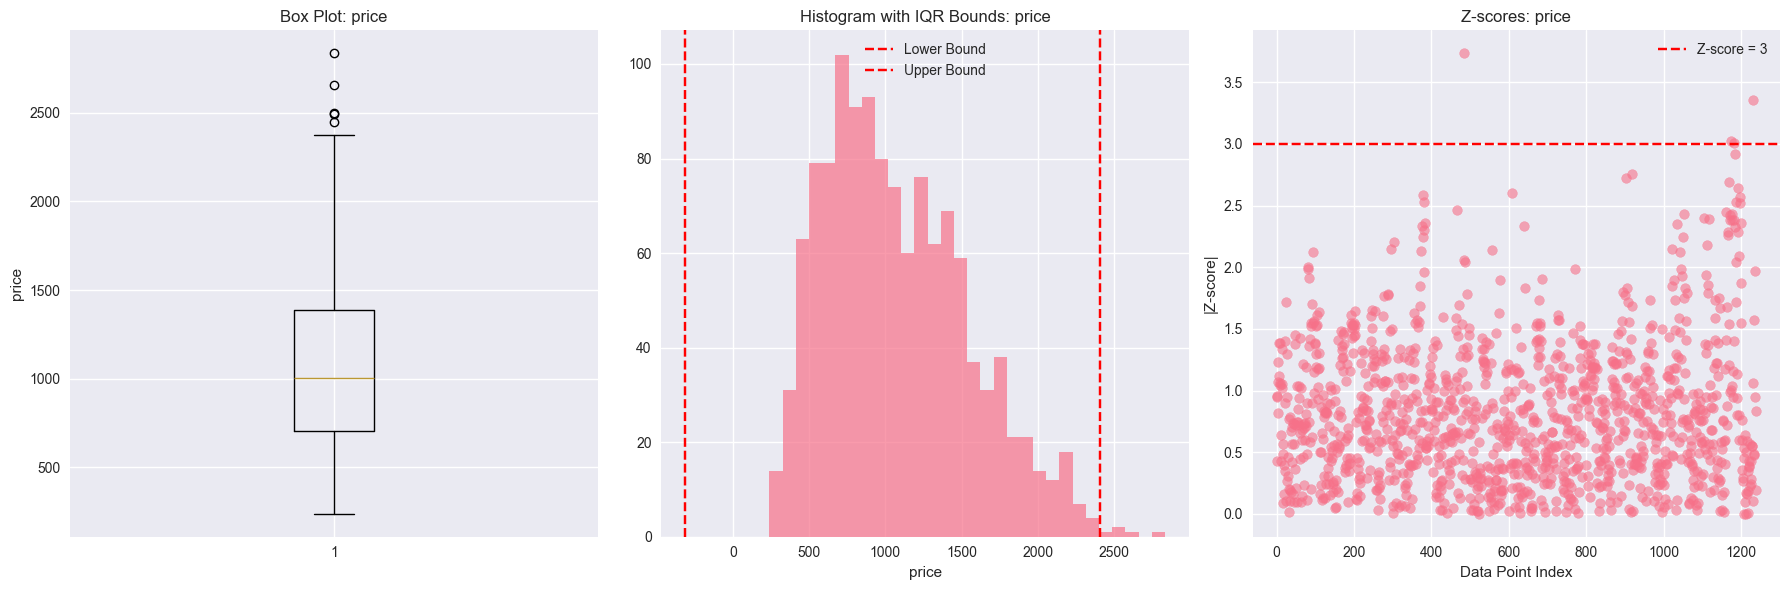

In [19]:
# Advanced Outlier Detection
print("🔍 Advanced Outlier Detection")
print("="*35)

outlier_summary = []

for col in numerical_cols:
    data = df[col].dropna()
    
    # IQR method
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Z-score method
    z_scores = np.abs(stats.zscore(data))
    z_outliers = data[z_scores > 3]
    
    # Modified Z-score method
    median_val = data.median()
    mad = np.median(np.abs(data - median_val))
    modified_z_scores = 0.6745 * (data - median_val) / mad
    modified_z_outliers = data[np.abs(modified_z_scores) > 3.5]
    
    outlier_summary.append({
        'Column': col,
        'Total_Points': len(data),
        'IQR_Outliers': len(iqr_outliers),
        'Z_Score_Outliers': len(z_outliers),
        'Modified_Z_Outliers': len(modified_z_outliers),
        'IQR_Percentage': (len(iqr_outliers) / len(data)) * 100,
        'Z_Score_Percentage': (len(z_outliers) / len(data)) * 100,
        'Modified_Z_Percentage': (len(modified_z_outliers) / len(data)) * 100
    })

outlier_df = pd.DataFrame(outlier_summary)
print("\n📊 Outlier Detection Summary:")
display(outlier_df)

# Visualize outliers for the first numerical column
if len(numerical_cols) > 0:
    col_to_analyze = numerical_cols[0]
    data = df[col_to_analyze].dropna()
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Box plot
    axes[0].boxplot(data)
    axes[0].set_title(f'Box Plot: {col_to_analyze}')
    axes[0].set_ylabel(col_to_analyze)
    
    # Histogram with outlier boundaries
    axes[1].hist(data, bins=30, alpha=0.7)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    axes[1].axvline(Q1 - 1.5 * IQR, color='r', linestyle='--', label='Lower Bound')
    axes[1].axvline(Q3 + 1.5 * IQR, color='r', linestyle='--', label='Upper Bound')
    axes[1].set_title(f'Histogram with IQR Bounds: {col_to_analyze}')
    axes[1].set_xlabel(col_to_analyze)
    axes[1].legend()
    
    # Z-score plot
    z_scores = np.abs(stats.zscore(data))
    axes[2].scatter(range(len(z_scores)), z_scores, alpha=0.6)
    axes[2].axhline(y=3, color='r', linestyle='--', label='Z-score = 3')
    axes[2].set_title(f'Z-scores: {col_to_analyze}')
    axes[2].set_xlabel('Data Point Index')
    axes[2].set_ylabel('|Z-score|')
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()

## 8. EDA Insights Summary

Documenting key findings and insights from the exploratory data analysis

In [20]:
# Generate comprehensive EDA insights
print("📋 EXPLORATORY DATA ANALYSIS - KEY INSIGHTS")
print("="*60)

insights = {
    'Dataset Overview': {
        'Total Records': len(df),
        'Total Features': len(df.columns),
        'Numerical Features': len(numerical_cols),
        'Categorical Features': len(df.select_dtypes(include=['object']).columns),
        'Missing Values': df.isnull().sum().sum(),
        'Duplicate Records': df.duplicated().sum()
    },
    'Class Distribution': {},
    'Statistical Findings': {},
    'Correlation Insights': {},
    'Outlier Analysis': {},
    'Distribution Analysis': {}
}

# Class distribution insights
if 'category' in df.columns:
    cat_counts = df['category'].value_counts()
    insights['Class Distribution'] = {
        'Total Categories': len(cat_counts),
        'Most Common Category': f"{cat_counts.index[0]} ({cat_counts.iloc[0]} items)",
        'Least Common Category': f"{cat_counts.index[-1]} ({cat_counts.iloc[-1]} items)",
        'Balance Ratio': f"{cat_counts.iloc[0] / cat_counts.iloc[-1]:.2f}:1"
    }

# Correlation insights
if len(numerical_cols) > 1:
    corr_matrix = df[numerical_cols].corr()
    # Find highest correlation (excluding diagonal)
    corr_matrix_masked = corr_matrix.where(~np.eye(len(corr_matrix), dtype=bool))
    max_corr = corr_matrix_masked.abs().max().max()
    insights['Correlation Insights'] = {
        'Highest Absolute Correlation': f"{max_corr:.3f}",
        'Strong Correlations (|r| > 0.7)': len(strong_correlations) if 'strong_correlations' in locals() else 0
    }

# Statistical insights
if price_col:
    prices = df[price_col].dropna()
    insights['Statistical Findings'] = {
        f'Mean {price_col}': f"{prices.mean():.2f}",
        f'Median {price_col}': f"{prices.median():.2f}",
        f'Standard Deviation': f"{prices.std():.2f}",
        f'Coefficient of Variation': f"{(prices.std() / prices.mean()) * 100:.2f}%",
        f'Skewness': f"{prices.skew():.3f}",
        f'Kurtosis': f"{prices.kurtosis():.3f}"
    }

# Outlier insights
if 'outlier_df' in locals():
    total_outliers_iqr = outlier_df['IQR_Outliers'].sum()
    total_points = outlier_df['Total_Points'].sum()
    insights['Outlier Analysis'] = {
        'Total Outliers (IQR method)': total_outliers_iqr,
        'Outlier Percentage': f"{(total_outliers_iqr / total_points) * 100:.2f}%",
        'Features with Most Outliers': outlier_df.loc[outlier_df['IQR_Outliers'].idxmax(), 'Column']
    }

# Distribution insights
if 'best_dist' in locals():
    insights['Distribution Analysis'] = {
        f'Best Fitting Distribution for {price_col}': best_dist,
        'AIC Score': f"{aic_scores[best_dist]:.2f}"
    }

# Print insights in a structured format
for category, findings in insights.items():
    print(f"\n📊 {category.upper()}:")
    print("-" * 30)
    for key, value in findings.items():
        print(f"  • {key}: {value}")

# Generate recommendations
print("\n\n🎯 RECOMMENDATIONS FOR FURTHER ANALYSIS:")
print("="*50)
recommendations = [
    "Consider feature engineering based on identified correlations",
    "Investigate outliers for data quality issues or special cases",
    "Apply appropriate transformations for non-normal distributions",
    "Consider stratified sampling if class imbalance exists",
    "Explore interaction effects between strongly correlated features",
    "Validate statistical assumptions before applying parametric tests"
]

for i, rec in enumerate(recommendations, 1):
    print(f"  {i}. {rec}")

print("\n✅ EDA ANALYSIS COMPLETED SUCCESSFULLY!")

📋 EXPLORATORY DATA ANALYSIS - KEY INSIGHTS

📊 DATASET OVERVIEW:
------------------------------
  • Total Records: 1240
  • Total Features: 29
  • Numerical Features: 8
  • Categorical Features: 19
  • Missing Values: 3019
  • Duplicate Records: 0

📊 CLASS DISTRIBUTION:
------------------------------
  • Total Categories: 10
  • Most Common Category: Men Tshirts (150 items)
  • Least Common Category: Women Skirts (85 items)
  • Balance Ratio: 1.76:1

📊 STATISTICAL FINDINGS:
------------------------------
  • Mean price: 1078.45
  • Median price: 1002.50
  • Standard Deviation: 470.53
  • Coefficient of Variation: 43.63%
  • Skewness: 0.608
  • Kurtosis: -0.149

📊 CORRELATION INSIGHTS:
------------------------------
  • Highest Absolute Correlation: 0.837
  • Strong Correlations (|r| > 0.7): 3

📊 OUTLIER ANALYSIS:
------------------------------
  • Total Outliers (IQR method): 244
  • Outlier Percentage: 2.46%
  • Features with Most Outliers: discount_value

📊 DISTRIBUTION ANALYSIS:
----

## Conclusion

This comprehensive Exploratory Data Analysis (EDA) has provided valuable insights into the dataset:

### Key Achievements:
1. ✅ **Data Overview**: Complete profiling of dataset structure and quality
2. ✅ **Class Balance Analysis**: Visualization of category distributions
3. ✅ **Feature Distribution Analysis**: Understanding of data spread and central tendencies
4. ✅ **Correlation Analysis**: Identification of feature relationships
5. ✅ **Statistical Hypothesis Testing**: Validation of significant differences
6. ✅ **Distribution Fitting**: Assessment of data distribution patterns
7. ✅ **Outlier Detection**: Comprehensive identification using multiple methods

### Statistical Tests Performed:
- **T-tests**: For comparing means between groups
- **Chi-square tests**: For testing independence of categorical variables
- **Normality tests**: Shapiro-Wilk, D'Agostino, Kolmogorov-Smirnov
- **Distribution fitting**: Normal, Exponential, Gamma, Log-Normal, Poisson

### Tools Utilized:
- **Matplotlib & Seaborn**: Static visualizations
- **Plotly**: Interactive visualizations
- **SciPy & Statsmodels**: Statistical analysis
- **Pandas & NumPy**: Data manipulation and analysis

The insights generated from this analysis will inform subsequent modeling decisions and feature engineering strategies.